# Analysing the AirBnB market in Athens
---

>Full name: Gaganis Michail <br/>
>Student ID: 8200234 <br/>
>Athens University of Economics and Business <br/>
>Contact: t8200234@aueb.gr

## Getting familiar with our data

* For the purposes of this project we will used data kindly provided to us by [InsideAirbnb](http://insideairbnb.com/), more specificaly [this page](http://insideairbnb.com/get-the-data) (data may or may not be available, this Notebook was written September of 2023)<br/>

* We can quickly figure out that for each city, there are 6 files of data provided. We should first take a look inside to figure out what we're dealing with.<br/>
* We will use [pandas](https://pandas.pydata.org/) dataframes for analysis in this notebook, so first we should import the module and load the `listings.csv` file.<br/>



In [1]:
import pandas as pd
listings = pd.read_csv('airbnb_data/listings.csv')
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579


## Neighbourhood Listings in Descending Order

> Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

* By popularity we refer to the number of listings in a certain neighborhood. I.e, the more listings a neighborhood has, the more popular it is.

* Before looking into the number of listings per neighborhood we should check whether our data is appropriated to use for analysis.

* On this specific case, we only mean to count the listings per neighborhood. So at the moment we only need to check the particular column. 

In [2]:
listings['neighbourhood'].isnull().values.any()

False

* Since the subset of data needed seems to be in order (no NaN values) we can go ahead and use it to answer our questions.

* Lets take a look at our neighborhoods, as well as their number.

In [3]:
listings['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΚΕΡΑΜΕΙΚΟΣ',
       'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΣΤΑΔΙΟ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ', 'ΠΑΓΚΡΑΤΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΘΗΣΕΙΟ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ',
       'ΖΑΠΠΕΙΟ', 'ΣΕΠΟΛΙΑ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΟΛΥΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΕΛΛΗΝΟΡΩΣΩΝ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ'], dtype=object)

In [4]:
listings['neighbourhood'].nunique()

44

* Our neighborhoods seem to be a subset of the wider Athens area, but cross-checking with the website we can tell that the neighborhoods listed here are the neighborhoods within the limits of the map on the site.

* That means that our data seemingly is intact and usable.

### Let's visualise our data

* A good depiction for the cardinality of each neighborhood should be a bar chart, where each bar is the number of listings in a neighborhood.

* For plots like this we shall use `matplotlib` whenever possible. 

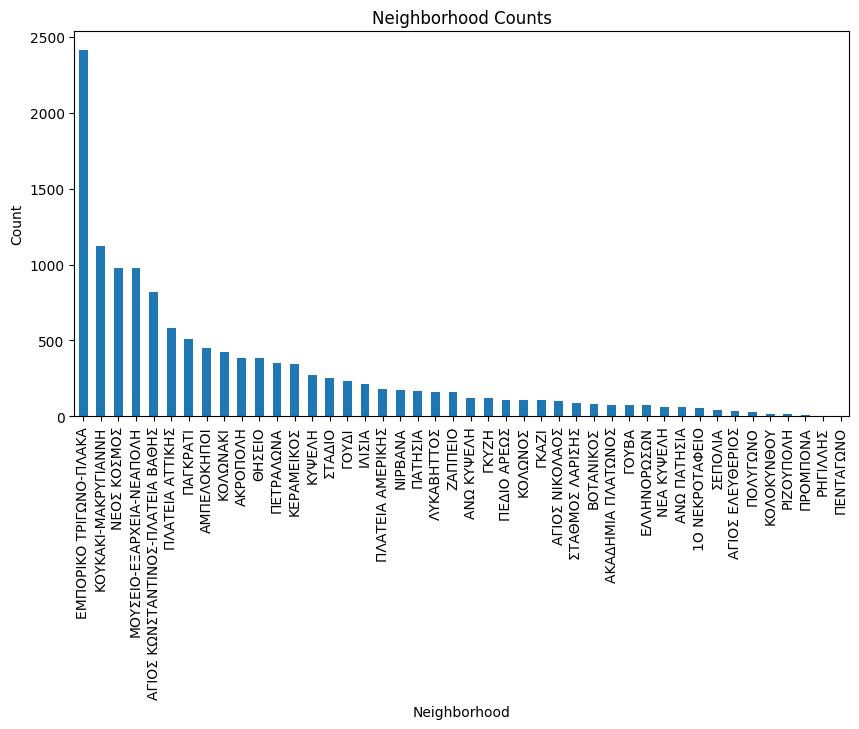

In [9]:
import matplotlib.pyplot as plt

neighborhood_counts = listings['neighbourhood'].value_counts()
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)#sort in a descending order

plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
neighborhood_counts.plot(kind='bar')
plt.title('Neighborhood Counts')
plt.xlabel('Neighborhood')
_ = plt.ylabel('Count')

* The plot itself seems alright, the data matches the trends of where people that use Airbnb may stay. However there are some problems:
1. The most popular neighborhood, ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ (Downtown Athens/Plaka) skews the plot since it's so much bigger than all the other areas.

2. Tilting our heads is not fun, so lets put the neighborhoods on the vertical axis.

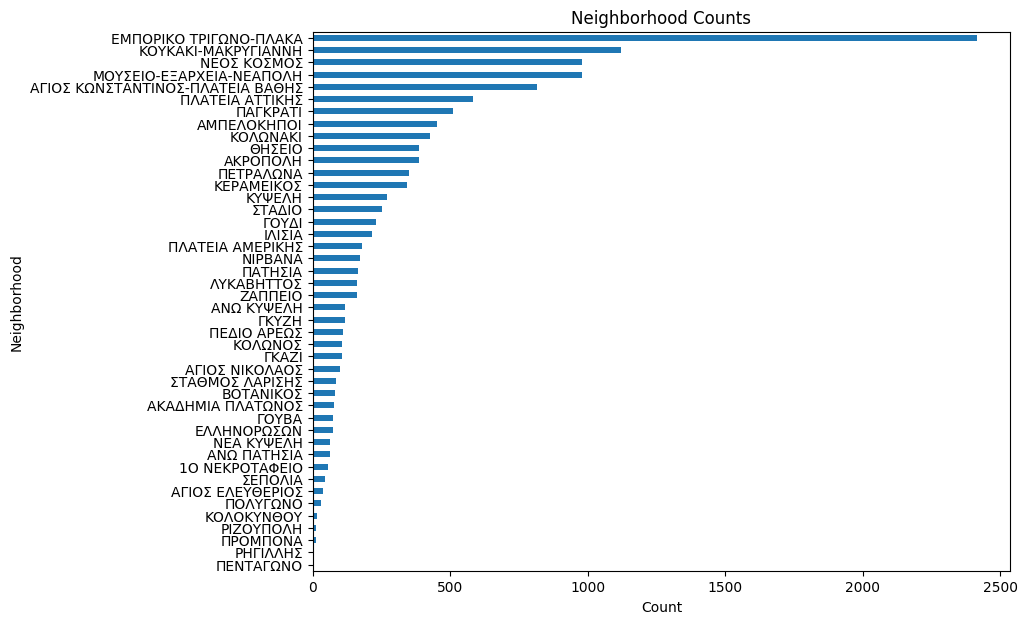

In [13]:
neighborhood_counts = neighborhood_counts.sort_values(ascending = True)#sort in an ascending order

plt.figure(figsize=(9, 7))
neighborhood_counts.plot(kind='barh')#barh instead of bar to flip the axes
plt.title('Neighborhood Counts')
plt.xlabel('Count')
_ = plt.ylabel('Neighborhood')

* This plot is the one that depicts the truth in a more comfortable manner. 

* Removing a neighborhood from our graph isn't strictly speaking correct (since we distort our data greatly), so we shall have a second, supporting graph, detailing the rest of the areas.

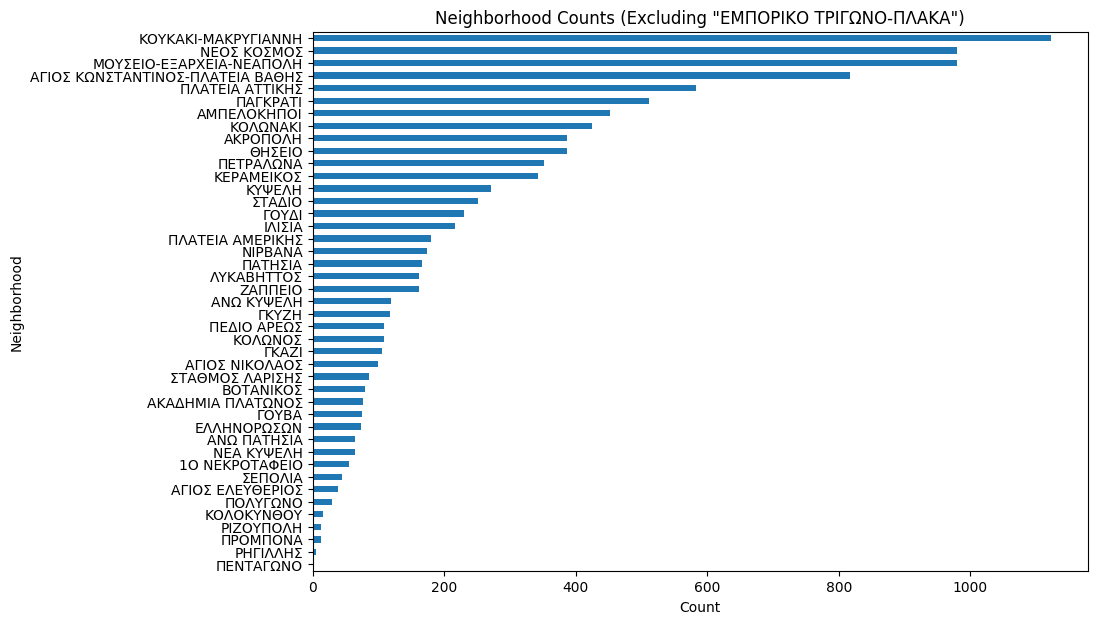

In [19]:
neighborhood_counts = listings[listings['neighbourhood'] != 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ']['neighbourhood'].value_counts()

neighborhood_counts = neighborhood_counts.sort_values(ascending=True)

# Create the bar chart with neighborhoods on the vertical axis
plt.figure(figsize=(10, 7))  # You can adjust the figure size as needed
neighborhood_counts.plot(kind='barh')  # Use 'barh' for horizontal bar chart
plt.title('Neighborhood Counts (Excluding "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ")')
plt.xlabel('Count')
_ = plt.ylabel('Neighborhood')

* This graph seems to depict the difference among the other neighborhoods way more clearly.